# Matrix Factorization and Dimensionality Reduction


## Dimensionality Reduction

### PCA, Discriminants, Manifold Learning

04/01/20

Andreas C. Müller



Today we're going to talk about dimensionality reduction,
mostly about principal component analysis. We're also going
to talk about discriminant analysis and manifold learning.

These all slightly different sets of goals. But the main
idea here is to take a high dimensional input dataset and
produce the dimensionality for processing. It can be either
before the machine learning pipeline or often for
visualization.


FIXME PCA components and scaling: xlabel for components 0 and 1
FIXME LDA projection slide with explanation and diagram!
FIXME compare Largevis, t-SNE, UMAP
FIXME print output in PCA slides: I need to know the dimenionality (29?)
FIXME trim tsne animation (why?)
FIXME write down math for inverse transform? (and for pca transform?)
FIXME show unwhitened vs whitened plot

## Principal Component Analysis

.center[
![:scale 70%](images/pca-intuition.png)
]



Here, we have a 2D input space, there's some point scattered
here. The color is supposed to show you where the data goes
in the transformations. PCA finds the directions of the
maximum variant in the data.

So starting with this blob of data, you look at the
direction that is the most elongated. And then you look for
the next opponent that captures the second most various,
that's orthogonal to the first component. Here in
2-dimensions, there's only one possibility to be orthogonal
to the first component and so that's our second component.

If you're in higher dimensions, there are obviously
infinitely many different directions that could be
orthogonal, and so then you would iterate.

What PCA returns is basically an orthogonal basis of the
space where the components are ordered by how much variance
of the data they cover and so we get a new basis of the
original space. So we can do this until like N dimensions
many times. In this example, I could do two times, after
that there are no orthogonal vectors left.

And so this new basis corresponds to rotating the input
space, I can rotate the input space so that the first
component is my X-axis and the second component is my Y-axis
and this is the transformation that PCA learns.

This doesn't do any dimensionality reduction as of yet, this
is just a rotation of the input space. If I want to use it
for dimensionality reduction, I can now start dropping some
of these dimensions. So they are ordered by decreasing
variance, I could in this example drop, for example, the
second component only to regain the first component.

So basically, I dropped the Y-axis and projected everything
to the X line. And this would be dimensionality reduction
with the PCA going from two dimensions to one dimension. And
the idea is that if your data lives on a lower dimensional
space, or essentially lives on lower dimensional space,
embedded in high dimensional space, you could think of this
is mostly aligned or Gaussian blob along this direction and
there's a little bit of noise in this direction. The most
information about the data is sort of along this line.

The idea is that does one-dimensional projection now covers
as much as possible of this data set.

You can also look at PCA as being sort of a de-noising
algorithm, by taking this reduced representation in the
rotated space and rotating it back to the original space. So
this is basically transforming the data using PCA, the
rotation dropping one dimension rotating back, you end up
with this. And so this is through information that is
retained in this projection, basically. And so, arguably,
you still have a lot of information from this dataset.

## PCA objective(s)
$$\large\min_{X', \text{rank}(X') = r}\|X-X'\|$$
.center[
![:scale 45%](images/pca-intuition.png)
]


The maximum variance view can be formalized like this. So
basically, you look at the variance of a projection. So you
look over all possible vectors, U1 that have norm 1 and you
look at what's the variance of projecting the data X along
this axis and then the maximum of this will be the maximum
variance of the data.

You can also rewrite this in this way.

Once you compute U1, you subtract the projection onto U1
from the data. Then you get everything orthogonal to U1. And
then with this dataset where you subtracted the component
along U1, you can again find the direction of maximum
variance, and then you get U2 and so on iterate this….

One thing that you should keep in mind here is that the
direction of U1 or the PCA component doesn't matter.

These two definitions of the first principle component, if
you set U1 to –U1 it would be the same maximum. It only
depends on the direction of U1, not the sign. So whenever
you look at principal components, the sign is completely
meaningless.


Restricted rank reconstruction

## PCA objective(s)
.left-column[
$$\large\max\limits_{u_1 \in R^p, \| u_1 \| = 1} \text{var}(Xu_1)$$
$$\large\max\limits_{u_1 \in R^p, \| u_1 \| = 1} u_1^T \text{cov} (X) u_1$$
]
.smaller.right-column[
.center[
![:scale 90%](images/pca-intuition.png)
]
]


So second way to describe PCA is using Reconstruction Error.
I can look at how well this reconstruction here matches the
input space. And if I want a reconstruction X’, that is the
best possible in the least squares sense, so that is the
square norm. If I look at the square norm of X – X’, then
this is minimized exactly when I'm using X’, X’ is the PCA
reduction.

This is like written in a slightly different way. Because if
you solve this minimization problem, then you don't get the
rotation back, you get the data back. But this problem is
exactly solved by basically rotating using PCA direction,
dropping the data and then rotating back.

Maximizing the variance is the same thing as minimizing the
Reconstruction Error, given a fixed number of dimensions.



Find directions of maximum variance. (Find projection (onto
one vector) that maximizes the variance observed in the
data.)

Subtract projection onto u1, iterate to find more components.
Only well-defined up to sign / direction of arrow!

## PCA Computation
- Center X (subtract mean).
- In practice: Also scale to unit variance.
- Compute singular value decomposition:
![:scale 100%](images/pca-computation.png)


If I want to apply PCA to my dataset, the first thing I have
to do, which is sort of part of the algorithm subtracts the
mean. Any package will subtract the mean for you before it
does the SVD. What you should probably also do in practice
is to scale the data to unit variance.

And then the PCA algorithm just computes the singular level
decomposition.

We decompose the data X into an orthogonal, a diagonal, and
an orthogonal. V^T is number of features, U is number of
samples times number of samples, D is diagonal containing
singular values. Singular values correspond to the variance
of each of these directions. Usually, in SVD you sort them
by singular values. So the largest singular value
corresponds to the first principle components.

There's an additional processing step that you can do which
is the most basic form of PCA. You can also use these
entries of the diagonal to really scale the data in the
rotated space so that the variance is the same across each
of the new dimensions.

## Whitening
![:scale 100%](images/whitening.png)


So I take my original data, I rotate it, and then I scale
each of the dimension so that they have standard deviation
one. It’s basically the same as doing PCA and then doing
standard scaler.

You can see now the variance, visually looks like a ball, it
was a Gaussian before. In the context of signal processing,
in general, this is called whitening.

And if you want to use PCA as a feature transformation, to
extract features you might want to do that, because
otherwise, the magnitude of the first principle component
will be much bigger than the magnitude of the other
components since you just rotated it. So the small variance
directions will have only very small variance because that's
how you define them.

The question here is do you think the principal components
are of similar importance? Or do you think the original
feature is of similar importance?

And if you think the principal components are of similar
important then you should do this. So if you want to go on
and put this in a classifier, this might be helpful. But I
don't think I can actually give you a clear rule when you
would want to do this or when not to. But it kind of makes
senses if you think of it as being centered scaler in a
transformed space that seems like something that might be
helpful for a classifier.


Same as using PCA without whitening, then doing
StandardScaler.

## PCA for Visualization
```python
from sklearn.decomposition import PCA
print(cancer.data.shape)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(cancer.data)
print(X_pca.shape)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cancer.target)
plt.xlabel("first principal component")
plt.ylabel("second principal component")
components = pca.components_
plt.imshow(components.T)
plt.yticks(range(len(cancer.feature_names)), cancer.feature_names)
plt.colorbar()
```
![:scale 80%](images/pca-for-visualization-cancer-data.png)
]
.right-column[
![:scale 90%](images/pca-for-visualization-components-color-bar.png)]


I want to show you an example on real data set. So the first
data set I'm going to use it on is the breast cancer data
set.

The way I use PCA most often is probably for visualization.
I often do PCA with two components, because my monitor has
two dimensions.

I fit, transform the data and I scatter it and then I get
the scatter plot of the first principle component versus
second principal component. So this is the binary
classification problem, PCA obviously is a completely
unsupervised method, so it doesn't know what the class
labels but I could look whether this is a hard problem to
solve or is it an easy problem to solve. If I look at this
plot, maybe it looks like it's a relatively easy problem to
solve with the points being relatively well separated.

Now I look at the principal component vectors. So there are
two principal components, each of them has number of
features many dimensions. So this is shown here as a heat
map. And you can see that there are basically two features
that dominate the principal components, which is mean area
and worst area. And all the rest of the entries are
approximately zero. So actually, I didn't rotate my data at
all, I just looked at two features.

So I didn't scale my data, if I don't scale my data and a
particular feature has a much larger magnitude, this feature
will basically be the first principle component because if I
multiply a feature by 10,000, this feature will have the
largest variance of everything. There will be no direction
that has a larger variance than that.

+++
## Scaling!
```python
pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2))
X_pca_scaled = pca_scaled.fit_transform(cancer.data)
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=cancer.target, alpha=.9)
plt.xlabel("first principal component")
plt.ylabel("second principal component")
```
.center[![:scale 45%](images/scaled-pca-for-visualization-cancer-data.png)]


So now I scale the data. And then I get two components on
the cancer data set. And now actually the data looks even
better separated. Even with this unsupervised methods it
very clearly shows me what separation of the classes is, I
can also see things like the yellow class looks much denser
than the purple class, maybe there are some outliers here,
but this definitely gives me a good idea of this dataset.

So this is much more compact than looking at a 30x30 scatter
matrix, which I couldn't comprehend. So we can look at the
components again.



Imagine one feature with very large scale. Without scaling,
it’s guaranteed to be the first principal component!
+++
## Inspecting components
```python
components = pca_scaled.named_steps['pca'].components_
plt.imshow(components.T)
plt.yticks(range(len(cancer.feature_names)), cancer.feature_names)
plt.colorbar()
```
.smaller.left-column[
![:scale 70%](images/inspecting-pca-scaled-components.png)
]

.right-column[
![:scale 100%](images/inspecting-pca-scaled-components-2.png)]



So components are stored in the components attribute of the
PCA class. And you can see now all of the features
contribute to the principal components.

And if you're an expert in the area, and you know what these
features mean, sometimes it's possible to read something in
this. It's definitely helpful often to look at these
component vectors.

Another way to visualize the component vectors is to do a
scatter plot. But that only works basically for the first
two principal components. So you can basically look at the
positions of the original features, each dot here is one of
the original features, and you can look at how much does
this feature contribute to principal component one versus
principal component two. And so I can see that the second
principal component is dominated by mean fractal dimension
and the first personal component is dominated by the worst
perimeter. And worse perimeter negatively contributes to the
second principal component. And worst case point is also
very strong in the first principle component but has zero in
the second principal component.

This was sort of the first approach trying to use PCA for
2-dimensional visualization and trying to understand what
the components mean.

sign of component is meaningless!
+++
## PCA for regularization
.tiny-code[
```python
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)
lr = LogisticRegression(C=10000).fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
```
```
0.993
0.944
```
```python
pca_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(C=10000))
pca_lr.fit(X_train, y_train)
print(pca_lr.score(X_train, y_train))
print(pca_lr.score(X_test, y_test))
```
```
0.961
0.923
```
]


One thing that PCA is often used for, in particular for
statistics oriented people, is using it for regularizing a
model. You can use PCA to reduce the dimensionality of your
data set and then you can do a model on the on the reduced
dimensional data set. Since it has fewer features, this will
have less complexity, less power so you can avoid
overfitting by reducing the dimensionality.

I’ve given an example here on the same data set. I'm using
logistic regression, and I basically turn off
regularization. Instead of using L2 regularization in linear
regression, I'm trying to do reduce the input space.

So you can see that, if I do that, I basically overfit the
data perfectly. So on the training dataset, I have 99.3%
accuracy, and on test dataset I have 44.4% accuracy.

Now if I use PCA with two dimensions, I reduce this down to
just two features. I basically reduce overfitting a lot so I
get a lower training score but I also get a lower test
score.

Generally, if you find that you only need 2-dimension to
solve a problem, then that’s a very simple problem. But if
you're shooting for accuracy, clearly you’ve regularized too
much, you're restricted to the model too much by just using
two components. One way to figure out a good number of
components, obviously, doing grid search with
cross-validation. Another way is to look at the variance
that it is covered by each of the components, so this is
basically the singular values.

## Variance covered
.center[
![:scale 55%](images/variance-covered.png)
]
```python
pca_lr = make_pipeline(StandardScaler(), PCA(n_components=6), LogisticRegression(C=10000))
pca_lr.fit(X_train, y_train)
print(pca_lr.score(X_train, y_train))
print(pca_lr.score(X_test, y_test))
```
```
0.981
0.958
```



So here are for the singular values. Here is the explained
variance ratio, basically how much of the variance in the
data is explained by each of the components. The components
are sorted by decreasing variance so obviously, this always
goes down. But now I can sort of look for kinks in this
variance that's covered and I can see how many components it
makes sense to keep for this dataset maybe if you don't want
to do a grid search.

Looking at the top plot, it looks like the six components
are enough. And if I actually use six components, I overfit
slightly less in the training dataset, I get a better result
than I did without using PCA.

People from statistics like this better than regularization
since this doesn't bias to coefficients. I like it slightly
less because the PCA is completely unsupervised and it might
discard important information. But it's definitely a valid
approach to regularize linear model.

If you're using a linear model, what's nice is that you can
still interpret the coefficients afterward. The linear model
is just the dot product with the weights and PCA is just a
rotation. And so it can take the coefficients and rotate
them back into the original space.



Could obviously also do cross-validation + grid-search
+++
## Interpreting coefficients
.tiny-code[```python
pca = pca_lr.named_steps['pca']
lr = pca_lr.named_steps['logisticregression']
coef_pca = pca.inverse_transform(lr.coef_)```]
.center[Comparing PCA + Logreg vs plain Logreg:]


.left-column[
![:scale 100%](images/PCA+logreg.png)
]
.right-column[
![:scale 100%](images/logreg+noPCA.png)
]


So that's what I'm doing here. I use the logistic
regression coefficients in the PCA space, I think this was
six components. And so then I can scatter them and look at
them, what do these components mean, in terms of the
original features.

Here, I’m looking at with no PCA, which is just the logistic
regression on the original data set, versus doing PCA, doing
logistic regression on the six-dimensional data set, and
then rotating the six coefficients back into the input
space. Even though I did this transformation of the data, I
can still see how this model in the reduced feature space
uses these features.

The left plot shows plain logistic regression coefficients
and the back-rotated coefficients with PCA.
The plot on the right shows for each feature the coefficient
in the standard model and in the model including PCA.
And you can see that they're
sort of related. They're not going to be perfectly related
because I reduced the dimensionality of this space and also
the model with PCA did better in this case. So clearly
they’re different.



Rotating coefficients back into input space. Makes sense
because model is linear! Otherwise more tricky.
+++
## PCA is Unsupervised!
.left-column[
![:scale 100%](images/pca-is-unsupervised-1.png)
]
--
.right-column[
![:scale 100%](images/pca-is-unsupervised-2.png)
]


Look at this dataset. It's a very fabricated data set. This
is a 3d classification problem in two dimensions. This looks
very unstructured.

So if I do a PCA, I get this. And so if I now look at the
first two principal components, the problem is actually
completely random, because that's how I synthetically
constructed it. And if I look at the third principal
component, the third component perfectly classifies the
dataset. Even though I constructed to be like that, there's
nothing that prevents the data set in reality not to look
like that. Just because the data is very small, or has small
variance in a particular direction doesn't mean this
direction is not important for classification. So basically,
if you’re dropping components with small variance, basically
what you're doing is you're doing feature selection in the
PCA space based on the variance of the principal components.
And so that's not necessarily a good thing. Because small
variance in principal component doesn't necessarily mean
uninformative.


Dropping the first two principal components will result in
random model!
All information is in the smallest principal
component!

+++
## PCA for feature extraction
.center[
![:scale 85%](images/pca-for-feature-extraction.png)
]


Next, I want to give an example of where PCA has been used,
at least historically, for faces. This is a data set
collected in the 90s.

The idea is you have a face detector, given the face, you
want to identify who this person is. Working on the original
pixel space kind of seems like a pretty bad idea.

The images here have about 6000 pixels, they're relatively
low resolution but still has like 5000 features, just
looking at the pixel values, which means very high
dimensional.

You can do a PCA and this is sort of the components that you
get from this. You can see here, for example, here, from
which direction does light come from, how much eyebrows do
you have and do you have a mustache. These are the PCA
components constructed on this data set.

The idea is that these PCA components can be better features
for doing classification than the original pixels. And this
is an application where whitening helps. Rescaling the
feature components so that they all have the same variance
actually helps classification.

One different way to think about these components instead of
thinking about the mass rotations is you can think about
equivalently that each point is a linear combination of all
the components because the components form a basis of the
input space. You can think that each picture, for example,
Winona Ryder here, is a linear combination of all the
components and these coefficients of linear combinations are
the projection in the PCA space. I mean, these are the
coefficients in the PCA bases after rotation. To me, this
makes it more interpretable what these components might
mean.

So if I have, light from the person's right, then I would
expect X1 want to be high, because then this component
becomes active. If the light comes from a different
direction, I would expect X1 to be negative. If there's no
left or right gradient, I would expect the component to be
about zero.


+++
## 1-NN and Eigenfaces
.tiny-code[
```python
from sklearn.neighbors import KNeighborsClassifier
## split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
print(X_train.shape)
## build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
```
```
(1547, 5655)
0.23
```
]
--
.tiny-code[
```python
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape
```
```
(1547, 100)
```
```python
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
knn.score(X_test_pca, y_test))
```
```
0.31
```
]


Alright, so now let's look at what it does. So here, on this
dataset, I’m doing one nearest neighbor classifier. The
reason I'm using one nearest neighbor classifier is that
that's often used if people want to demonstrate what a good
representation of the data is. The idea is that one nearest
neighbor classifier just looks at your nearest neighbor and
so it only relies on your representation of the data. So if
1NN classifier does well, your representation of the data is
good. That’s the intuition behind this.

If I use a linear model that's penalized, PCA will probably
not make a lot of difference actually.

Here with the nearest neighbor equal to one, you get about
23% accuracy. And you can see that the data set is very
wide. So there are a lot more features than there are
samples.

If there are more features than in samples. PCA can only do
as many components as there is the minimum of features and
samples. So in this case, I could project a maximum of up to
1547 directions because this is the rank of the matrix and I
can only get so many Eigenvectors.

If I do the same thing with PCA, I go down from 5600
dimensions to only 100 dimensions and then the 1NN
classifier actually does quite a bit better. Now it's 31%
accurate.

You could do a grid search to find the number of components
or you could look at the explained variance ratio.

## Reconstruction
.center[
![:scale 70%](images/reconstruction.png)
]


Another way to select how many components you want for
classification instead of looking at the explained various
ratios is looking at the reconstructions. That is most
useful if you can look at the data points in some meaningful
way.

So for example, here, the bottom right image in my
illustration is what happens if I rotate to 10 dimensions
and then I rotate back to the original space. For example,
you can see here if I use only 10 components, these people
are not recognizable at all. So I wouldn't expect 10
components to make to make a lot of sense. On the other
hand, if I look at 500 components, even though there’s
high-frequency noise the person is recognizable. Using 500,
I'm probably not going to lose anything here.

This is also one way to see how many components you might
need for a particular result. And so if I just use two
components, you would see probably nothing.

And yet, if I used as many components as there are samples
in this case, if I used like 1500 components, it would be
completely perfect, because I would basically rotate in
space, not drop any dimensions and rotate back.

Another thing that's interesting when you’re doing
reconstructions is there’s a different application for PCA
called outlier detection.

You can think of PCA as a density model in the sense, you're
fitting a big Gaussian and then you dropping directions of
small variance. And so you can look at what are the faces
that are reconstructed well versus those that are not
reconstructed well. And so if they're not reconstructed as
well, that means they are quite different from most of the
data.

## PCA for outlier detection
.tiny-code[```python
pca = PCA(n_components=100).fit(X_train)
reconstruction_errors = np.sum((X_test - pca.inverse_transform(pca.transform(X_test))) ** 2, axis=1)
```
]
.left-column[
![:scale 90%](images/best-reconstructions.png)


Best reconstructions
]
.right-column[
![:scale 90%](images/worst-reconstructions.png)


Worst reconstructions
]


So here, I used 100 components. And now I can look at what's
the reconstruction error of rotating the data, dropping some
components and rotating back, and the ones with good
reconstructions are the ones that look like most of the
data. And the ones that have bad reconstructions are the
ones that are sort of outliers.

If something looks a lot like the data, that's probably
something the principal component will cover. Whereas if
something looks very different than the data, that's
something that principal component will not cover.

If you look at these images, what is an outlier and what is
not an outlier has nothing to do with the person in it but
has only to do with the cropping of the image. So these
images are all not very well aligned, they have like tilted
head, wearing glasses, cropped too wide, cropped not wide
enough, wearing caps and so on. Since they look very
different from most of the images, and that's why they're
outliers.

But you can use this in general, as a density model,
basically, looking at how well can the data point be
reconstructed with PCA.

There are more uses of PCA. These are like a couple of
different applications of PCA that all have sort of quite
different goals and quite different ways of setting
dimensionality.




+++

## Discriminant Analysis


So the next thing I want to talk about is discriminate
analysis. In particular, linear discriminate analysis. This
is also a classifier, but it also can do dimensionality
reduction.
+++
## Linear Discriminant Analysis aka Fisher Discriminant

$$    P(y=k | X) = \frac{P(X | y=k) P(y=k)}{P(X)} = \frac{P(X | y=k) P(y = k)}{ \sum_{l} P(X | y=l) \cdot P(y=l)}$$


Linear Discriminant Analysis is also called LDA, but never
call it LDA because LDA also means Latent Dirichlet
Allocation and so it might be confusing.

Linear Discriminant Analysis is a linear classifier that
builds on Bayes rule, in that, it assumes the density model
for each of the classes, if you have a density model for
each of the classes, you can build a classifier using Bayes
rule.

This is Bayes rule of having a joint distribution of X and
Y. If you then look at the conditional probability of X, you
can say that the probability of Y being a particular class
given X is the probability of X given Y is class, times
probability of being in this class divided by P(X).

And so you can expand this now here, the P(x) as a sum over
all classes. And so the only thing you really need is a
probability distribution of P(X) given a particular class.
So if you fix any possibilities distribution for particular
class Bayes rule gives you like a classifier. Linear
Discriminant Analysis does basically one particular
distribution, which is the Gaussian distribution.



- Generative model: assumes each class has Gaussian distribution
- Covariances are the same for all classes.
- Very fast: only compute means and invert covariance matrix (works well if n_features 
<
<
 n_samples)
- Leads to linear decision boundary.
- Imagine: transform space by covariance matrix, then nearest centroid.
- No parameters to tune!
- Don’t confuse with Latent Dirichlet Allocation (LDA)

+++
## Linear Discriminant Analysis aka Fisher Discriminant

$$    P(y=k | X) = \frac{P(X | y=k) P(y=k)}{P(X)} = \frac{P(X | y=k) P(y = k)}{ \sum_{l} P(X | y=l) \cdot P(y=l)}$$

$$ p(X | y=k) = \frac{1}{(2\pi)^n |\Sigma|^{1/2}}\exp\left(-\frac{1}{2} (X-\mu_k)^t \Sigma^{-1} (X-\mu_k)\right) $$


So what we're doing is basically, we're fitting a Gaussian
to each of the classes, but we're sharing the covariance
matrix. So for each class, we estimate the mean of the
class, and then we estimate the joint covariance matrix, so
we subtract the mean of the class from all the data points,
and then we compute the covariance matrix of that.

So now we have fitted Gaussian into each class, they all
have the same covariance matrix and then we can apply this
rule. And this gives us a classifier.

+++
## Linear Discriminant Analysis aka Fisher Discriminant

$$    P(y=k | X) = \frac{P(X | y=k) P(y=k)}{P(X)} = \frac{P(X | y=k) P(y = k)}{ \sum_{l} P(X | y=l) \cdot P(y=l)}$$

$$ p(X | y=k) = \frac{1}{(2\pi)^n |\Sigma|^{1/2}}\exp\left(-\frac{1}{2} (X-\mu_k)^t \Sigma^{-1} (X-\mu_k)\right) $$

$$    \log\left(\frac{P(y=k|X)}{P(y=l | X)}\right) = 0 \Leftrightarrow (\mu_k-\mu_l)\Sigma^{-1} X = \frac{1}{2} (\mu_k^t \Sigma^{-1} \mu_k - \mu_l^t \Sigma^{-1} \mu_l) $$



You can actually write this in a slightly different way. The
decision boundary between the two classes is the same as
this formula on the right.

What this is basically, the single data point lies on the
decision boundary, if inverse square matrix times x is some
constant. This is actually just a nearest centroid
classifier in the space that was rotated by this joint
covariance matrix or rotated and stretched by the joint
covariance matrix.

So basically, I compute the joint covariance matrix and then
I look at what's the closest mean and I adjust it based on
the prior probabilities of the class.

+++
## Quadratic Discriminant Analysis
LDA: $$ p(X | y=k) = \frac{1}{(2\pi)^n |\Sigma|^{1/2}}\exp\left(-\frac{1}{2} (X-\mu_k)^t \Sigma^{-1} (X-\mu_k)\right) $$

QDA: $$ p(X | y=k) = \frac{1}{(2\pi)^n |\Sigma_k|^{1/2}}\exp\left(-\frac{1}{2} (X-\mu_k)^t \Sigma_k^{-1} (X-\mu_k)\right) $$



- Each class is Gaussian, but separate covariance matrices!
- More flexible (quadratic decision boundary), but less robust: have less points per covariance matrix.
- Can’t think of it as transformation of the space.


Quadratic Discriminate Analysis is exactly the same thing,
only that you have a separate covariance matrix for each of
the classes. This makes a more flexible classifier, but
also, you have fewer points to estimate each of the various
matrices. So you have many more parameters, which makes it a
little bit harder to fit.

+++
![:scale 55%](images/linear-vs-quadratic-discriminant-analysis.png)


If your data points are actually Gaussian, then obviously,
this works well because it assumes each class is a Gaussian.


If they have the same covariance matrix, Linear Discriminant
Analysis obviously finds the perfect boundary. If they have
different covariance matrix, then Quadratic Discriminant
Analysis does better.

What does this all have to do with dimensionality reduction?

So we can use it as a classifier. Linear Discriminant
Analysis is just a linear classifier with a particular
probabilistic model. If I want a linear classifier, I’ll
probably use a logistic regression instead. But what’s nice
about this is the joint covariance function.


+++
## Discriminants and PCA
- Both fit Gaussian model
- PCA for the whole data
- LDA multiple Gaussians with shared covariance
- Can use LDA to transform space!
- At most as many components as there are classes - 1 (needs between class variance)


Linear Discriminant Analysis compared to PCA, they both fit
a Gaussian to the data. The PCA basically fits a Gaussian to
the whole dataset while Linear Discriminant Analysis fits
multiple Gaussian with a shared covariance structure. So
that means we can use this covariance structure to rotate
our space or stretch our space using Linear Discriminant
Analysis.

Because of the way it's defined, we can get as many
components as there are classes minus one because you
basically look at the vector that connects the means of the
classes in the rotated space. So you rotate the space, and
then you look at the space spend by the means.

+++
## PCA vs Linear Discriminants
![:scale 100%](images/pca-lda.png)


Here's an example of doing Linear Discriminant Analysis
versus PCA on a synthetic dataset where I have three classes
and they all share a covariance matrix.

Obviously, that's the case Linear Discriminant Analysis was
designed for. If I do a PCA, PCA can’t really do a lot here
because it flips the x-axis because jointly all three of
this kind of looked like Gaussian and PCA is completely
unsupervised so it can't distinguish between these three.

If I used Linear Discriminant Analysis, it will a give me
this. And basically, the first discriminant that I mentioned
here will be the one that perfectly separates all the means.
So it gets out the interesting dimensions that helped me
classify.
+++
## Data where PCA failed
![:scale 100%](images/pca-fail.png)


So if I look at the data set that I created so that PCA
failed. So here, this was the original data set, all the
information was in the third principal component, if I do
Linear Discriminant Analysis I will get only one component.
The one component that was found by Linear Discriminant
Analysis, it's just the one that perfectly separates the
data.

So this is a supervised transformation of the data that
tries to find the features that best separate the data. I
find this very helpful for visualizing classification data
sets in a way that's nearly as simple as PCA but can take
the class information into account.


+++
## Summary
- PCA good for visualization, exploring correlations
- PCA can sometimes help with classification as regularization or for feature extraction.
- LDA is a supervised alternative to PCA.


PCA, I really like for visualization and for exploring
correlations, you can use it together with a classification
for regularization if you have lots of features. Often, I
find that regularization of the classifier works better.

T-SNE probably makes the nicest pictures of the bunch.

And if you want a linear transformation of your data in a
supervised setting Linear Discriminant Analysis is a good
alternative to PCA.




LDA also  also yields a rotation of the input spacA
+++
## Manifold Learning


Manifold learning is basically a class of algorithms that
are the much more complicated transformation of the data. A
manifold is a geometric structure in higher dimensions.

So the idea is that you have low dimensional space, and sort
of embedded into a high dimensional space. The classical
example is this Swiss roll.


+++
![:scale 100%](images/manifold-learning-structure.png)


Here, this is sort of a two-dimensional data set that was
embedded in a weird way in the three-dimensional data set.
And you hope to recover the structure of the data. And the
structure of the data here would be the 2D structure of the
layouts with Swiss roll. So PCA can't do that, because PCA
is only linear. So if you would project this down with two
dimensions, it's going to smooch all of these together and
the blue points will be very close to the red points, if it
projects down this axis, for example. And that's sort of not
really what the geometry of the data is like.

So for this, you would need nonlinear transformations of the
input space that can sort of try to capture the structure in
the data.



Learn underlying “manifold” structure, use for dimensionality reduction.
+++
## Pros and Cons
- For visualization only
- Axes don’t correspond to anything in the input space.
- Often can’t transform new data.
- Pretty pictures!


Manifold learning is for visualization purposes only. One of
the problems is the axis don't correspond to anything,
mostly. And often you can’t transform your data, but you can
get pretty pictures for your publications or to show your
boss.

These are mostly used for exploratory data analysis and less
in a machine learning pipeline. But they’re still sort of
useful.

+++
## Algorithms in sklearn
- KernelPCA – does PCA, but with kernels!

 Eigenvalues of kernel-matrix
- Spectral embedding (Laplacian Eigenmaps)

Uses eigenvalues of graph laplacian
- Locally Linear Embedding
- Isomap “kernel PCA on manifold”
- t-SNE (t-distributed stochastic neighbor embedding)


So some of the most commonly used algorithms which are in
scikit-learn are…

KernelPCA, which is just PCA but with kernels. So you set up
the covariance matrix, you look at the kernel matrix.

Spectral embedding, which looks at the eigenvalues of the
graph Laplacian. It's somewhat similar to kernel methods but
you compute the eigenvectors off like a similarity matrix.

There’s locally linear embedding.

There's Isomap.

Finally, t-SNE.

t-SNE stands for t-distribution stochastic neighbor
embedding, this is sort of the one that maybe has the least
strong theory behind it. But they're all kind of heuristics
and a little bit of hacky.

t-SNE is something that people found quite useful in
practice for inspecting datasets.

+++
## t-SNE

$$p_{j\mid i} = \frac{\exp(-\lVert\mathbf{x}_i - \mathbf{x}_j\rVert^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-\lVert\mathbf{x}_i - \mathbf{x}_k\rVert^2 / 2\sigma_i^2)}$$
--

$$p_{ij} = \frac{p_{j\mid i} + p_{i\mid j}}{2N}$$

--

$$q_{ij} = \frac{(1 + \lVert \mathbf{y}_i - \mathbf{y}_j\rVert^2)^{-1}}{\sum_{k \neq i} (1 + \lVert \mathbf{y}_i - \mathbf{y}_k\rVert^2)^{-1}}$$

--

$$KL(P||Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}$$



The main idea of t-SNE is that you define a probability
distribution over your data points, given one data point,
you want to say, “If I'm going to pick one of my neighbors
at random, and I'm going to do this weighted by distance,
how likely is it I'm going to pick neighbor I?”

This is just a Gaussian distribution with a particular sigma
that's dependent on the data point.

So around each data point, you look at the density of their
neighbors and you make it symmetric.

Assuming, we have embedded our data into some Yi and now it
can look at the distance between two of these Ys but we're
not using Gaussian, we’re using t-distributions.

So what you're doing then is, you initialize the Yi’s
randomly, and then you do gradient descent to basically make
these two distributions similar. This is quite different
from other embedding methods. Here, we're not learning
transformation at all, we’re just assigning these Yi’s
randomly in our target space, and then move them around so
that the distances are similar to the distances in the
original space.

What this means is basically things that were similar in
your original space should be similar in the new space as
well.

The reasons that they use a student-t here instead of a
Gaussian is because they didn't want to focus too much on
things that are too far away. You only want to focus on the
points that are pretty close to you.

This is used for embedding into two and three-dimensional
spaces. So 99% of the time you're using this with the Yi
being in two-dimensional space and the Xi being the original
data points.

The sigma is adjusted locally depending on how dense the
data is in a particular region. But there's the overall
parameter which is called the perplexity which basically
regulates how the local sigmas are set. So perplexity is
some transformation of the entropy of the distribution. So
you set the Sigma such that the entropy of the distribution
is the parameter you're setting.

If you set perplexity parametric low, you going to look at
only the close neighbors. If you set it large, you're going
to look at a lot of neighbors. This will indirectly
influence the sigma.



- Starts with a random embedding
- Iteratively updates points to make “close” points close.
- Global distances are less important, neighborhood counts.
- Good for getting coarse view of topology.
- Can be good for  nding interesting data point
- t distribution heavy-tailed so no overcrowding.
- (low perplexity: only close neighbors)
+++
![:scale 63%](images/tsne-embeddings-digits.png)


(Read the next slide and come to this)
So one way it can help me understand the data, this is
actually with different random seats so look slightly
different. Here, I show some of the images, so you can get
an idea of what's happening.

You can see that if the one is more angled and has like a
bar at the bottom, it's grouped over here. And if the one is
more straight and doesn't have a bar, that group over here.
The nines got actually split up into three groups. These are
actually pretty natural cluster, so it found out that there
are different ways to write nine with a bar in the bottom
and without a bar at the bottom.

Writing the code for this is a little bit of a hassle. But
often I find it quite helpful to look at these t-SNE
embedding and looking at outliers, helps me understand my
dataset.

One of the downsides of this is, I didn't write anything on
the axis, because there's nothing on the axis. These are
randomly initialized data points that have been moved around
to have similar distances. This is completely rotationally
variant. So if I rotated this picture or flipped it, it
would still mean the same thing.  So there's no possible
interpretation for the axis.


+++
.smaller[```python
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data / 16.
X_tsne = TSNE().fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X)
```]
.left-column[![:scale 95%](images/pca-digits.png)]
--
.right-column[![:scale 95%](images/tsne-digits.png)]


Now I want to show you some of the outcomes. This is a PCA
visualization of digit dataset, so both PCA and peacenik are
completely unsupervised. This is just doing PCA with two
components, first principle, and second principal component,
and then I color it by the class labels.

PCA obviously doesn’t anything about the class labels, I
just put them in here so we can see what's happening. You
can see that sort of some of these classes is pretty well
separated, others are like, kind of smooshed together.

This is in t-SNE, when I first saw this I thought this was
pretty impressive, because this Algorithm is completely
unsupervised, but it still manages to mostly group nearly
all of these classes in very compact clusters.

In this completely unsupervised method, I could sort of draw
boundaries by hand in 2D from the original 64-dimensional
space and I could group the data. This 2D view can help me
understand the data.
+++
## Showing algorithm progress

![:scale 50%](images/digits_tsne_animation.gif)

.smallest[https://github.com/oreillymedia/t-SNE-tutorial]

+++
## Tuning t-SNE perplexity
.left-column[
![:scale 70%](images/tsne-tuning-2.png)
![:scale 70%](images/tsne-tuning-5.png)]
.right-column[
![:scale 70%](images/tsne-tuning-30.png)
![:scale 70%](images/tsne-tuning-300.png)]


The one parameter I mentioned, is perplexity. I want to give
a couple of illustrations of the influence of this
perplexity parameter. This is again the digit dataset.

The results will be slightly different for each run because
of the randomness. The author suggests perplexity equal to
30 and says it always works.

Here it’s set to 2, 5, 30 and 300. And you can see that 30
actually does produce the most compact clusters. What will
give you the best results depends on the dataset.

Generally, for small data sets, I think people found lower
perplexity works better while for larger data sets, larger
perplexity works better. And again, there’s sort of a
tradeoff between looking at very close neighbors and looking
at neighbors further away.



- Important parameter: perplexity
- Intuitively: bandwidth of neighbors to consider
- (low perplexity: only close neighbors)
- smaller datasets try lower perplexity
- authors say 30 always works well.

+++
![:scale 25%](images/tsne-moons.png) ![:scale 55%](images/tsne-perplexity.png)


Here's the same for a very small two dimensional data set. I
wanted to see how well t-SNE can separate these out. Again,
perplexity equal to 30, probably looks the best to me.
+++
## Play around online

http://distill.pub/2016/misread-tsne/


There's a really cool article in this link.

The question was how do we reconcile categorical data with
this?

So this indeed, this seems to be continuous data. You can
apply it after one hot encoding. Sometimes the results will
look strange.

You might probably be able to come up with something that
more specifically uses the discrete distributions. But all
the things I talked about are really for continuous data.

Is s-SNE more computationally expensive than PCA?

Yes, by a lot. PCA is computing an SPD, which is like a very
centered linear algebra thing, which is very fast. And a lot
of people spent like 50 years optimizing it. Still, there's
a bunch of things to speed t-SNE.
+++
## UMAP
https://github.com/lmcinnes/umap
.smaller[
- Construct graph from simplices, use graph layout algorithm
- Much faster than t-SNE: MNIST takes 2 minutes vs 45 minutes for t-SNE]

![:scale 45%](images/umap_mnist.png)
![:scale 50%](images/umap_fashion_mnist.png)
+++
## LargeVis
https://github.com/elbamos/largeVis
.smaller[
- Use nearest neighbor graph constructed very efficiently (and approximately)
- Much faster than t-SNE
]
![:scale 47%](images/largevis_mnist.png)
![:scale 47%](images/largevis_wikidoc.png)
+++

## Questions ?


## NMF; Outlier detection

04/01/19

Andreas C. Müller


Today, I want to talk about non-negative matrix
factorization and outlier detection.

FIXME better illustration for NMF
FIXME list KL divergence loss for NMF
FIXME related gaussian model and Kernel density to GMM?
FIXME talk more about all outliers are different in different ways vs classification (add example where outlier is better?)
FIXME relate NMF to K-Means and PCA, give example, spell out vector quantization (maybe before NMF for factorization in general?)
FIXME realistic data for both NMF and for outlier detection. maybe cool time series for outlier detection? hum

## Check out dabl!

https://amueller.github.io/dabl/user_guide.html

For now: visualization and preprocessing

try:
```python
import dapl
dapl.plot(data_df, target_col='some_target')
```
and:
```python
import dapl
data_clean = dapl.clean(data)
```


## Non-Negative Matrix Factorization


NMF is basically in line with what we talked about with
dimensionality reduction but also related to clustering.
It’s a particular algorithm in a wider family of matrix
factorization algorithms.

#Matrix Factorization




.center[
![:scale 80%](images/matrix_factorization.png)
]



So matrix factorization algorithm works like this. We have
our data matrix, X, which is number of samples times number
of features. And we want to factor it into two matrices, A
and B.

A is number of samples times k and B is k times number of
features.

If we do this in some way, we get for each sample, a new
representation in k-dimensional, each row of k will
correspond to one sample and the columns of B will
correspond to the input features. So they encode how the
entries of A correspond to the original data. Often this is
called latent representation. So, these new features here in
A, somehow represent the rows of X and the features are
encoded in B.

#Matrix Factorization




.center[
![:scale 80%](images/matrix_factorization_2.png)
]
sklearn speak: `A = mf.transform(X)`

#PCA




.center[
![:scale 80%](images/pca.png)
]


The one example of this that we already saw is principal
component analysis. In PCA, B was basically the rotation and
then a projection. And A is just the  projection of X.

This is just one particular factorization you can do. I have
the sign equal, but usually, more generally, you're trying
to find matrixes A and B so that this is as close to equal
as possible.

In particular, for PCA, what we're trying to do is we try to
find matrices A and B so that the rows of B are orthogonal,
and we restrict the rank of k. K would be the number of
components and we get PCA, if we restrict the columns of B
to be orthogonal, then the product of matrixes A and B is
most close to X in the least square sense is the principal
component analysis.

## Other Matrix Factorizations

- PCA: principal components orthogonal, minimize
squared loss

- Sparse PCA: components orthogonal and sparse

- ICA: independent components

- Non-negative matrix factorization (NMF):
latent representation and latent features are nonnegative.



There’s a bunch of other matrix factorization. They
basically change the requirements we make in matrices A and
B and what is the loss that we optimize.

As I said, PCA wants the columns of B to be orthogonal, and
minimize the squared loss to the data.

In sparse PCA you do the same, but you say the entries of B
should also be sparse, so you put an L1 norm on it, and then
that maybe gives you more easily interpretable features or
definitely more sparse features.

Independent component analysis tries to make sure that the
projections given by B are statistically independent.

NMF is used more commonly in practice. In this, we restrict
ourselves to the matrices being positive, what I mean by
that is, each entry is a positive number.

## NMF




.center[
![:scale 80%](images/nmf.png)
]



In NMF, we compute X as a product of W and H. W stands for
weights, and H stands for hidden representation. We want to
find W and H so that their product is as close as possible
to X.


## NMF Loss and algorithm

Frobenius loss / squared loss ($ Y = H W$):

$$ l_{\text{frob}}(X, Y) = \sum_{i,j} (X_{ij} - Y_{ij})^ 2$$

Kulback-Leibler (KL) divergence:
$$ l_{\text{KL}}(X, Y) = \sum_{i,j} X_{ij} \log\left(\frac{X_{ij}}{Y_{ij}}\right) - X_{ij}  + Y_{ij}$$

--

optimization :
- Convex in either W or H, not both.
- Randomly initialize (PCA?)
- Iteratively update W and H (block coordinate descent)

--

Transforming data:

- Given new data `X_test`, fixed `W`, computing `H` requires optimization.


In literature: often everything transposed


## Why NMF?

--

- Meaningful signs

--

- Positive weights

--

- No “cancellation” like in PCA

--

- Can learn over-complete representation



Since everything is now positive, you have meaningful signs.
In, PCA the signs were arbitrary so you could flip all the
signs and component and it would still be the same thing. In
NMF, everything is positive so there's no flipping of signs.

All the weights are positive, this makes it much easier for
us to conceptualize. So you could think about, as each data
point is represented as a positive combination of the
columns of W, so positive combinations of these basic parts.
This is often thought to represent something like part. So
you basically build up each data point out of these columns
in W that has like positive contributions.

If you have like positive and negative coefficients it’s
usually much harder to interpret.

In PCA, you can get the cancellation effect. Basically, you
can have components that vary a lot in different directions
and so once you add them all up, the variation vanishes.

Since you have positive weights, you can think of NMF a
little bit like soft clustering, in the sense of slightly
related to GMMs, you can think of the columns of W as being
something like prototypes and so you express each data point
as a combination of these prototypes. Since they're all
positive, it's more similar to clustering.

Another thing that’s quite interesting is that you can learn
overcomplete representations. What that means is that you
can learn representations where you have more components and
features. So before we had this k and it was drawn as being
smaller than number of features, if you have more than
number of features, you can always trivially make W the
identity matrix, and so nothing happens. But if you add
particular restrictions to W and H, then you can learn
something, where actually the H is wider than X, which might
be interesting if you're interested in extracting
interesting features. In NMF, you can do this by, for
example, imposing sparsity constraints.



- positive weights -> parts / components
- Can be viewed as “soft clustering”: each point is
positive linear combination of weights.

- (n_components > n_features) by asking for sparsity (in either W or H)

.center[
PCA (ordered by projection, not eigenvalue)

![:scale 70%](images/pca_projection.png)
]

.center[
NMF (ordered by hidden representation)
![:scale 70%](images/nmf_hid_rep.png)
]



Here's an example of what this looks like in practice. Here
we have NMF and PCA.

This is the digit dataset, so the images are 28x28 grayscale
images. I have these the digits, 0 and 1, and I tried to
express them as a linear combination of the PCA components
and as a linear combination of the NMF components. Here, I
ordered them by which component is the most important for
each of these data points.

For both, 0 and 1, the most active component is this one,
which is a guess either 0 or 1, depending on whether it's
positive or negative. You can see that neither of these
latter components looks a hardly like a 0 or a 1.

What you’re seeing here is the cancellation effect taking
place.

The idea with NMF is that in NMF, hopefully, you got
something that’s more interpretable in particular, since
everything is positive.

Usually, we can't actually look at our data this easily and
so being able to interpret the component might be quite
important. Often, people use this for gene analysis, for
example, where you have very high dimensional vectors, and
if you want to see which genes act together and so having
these positive combinations really helps with
interpretability.

## Downsides of NMF

- Can only be applied to non-negative data

--

- Interpretability is hit or miss

--

- Non-convex optimization, requires initialization

--

- Not orthogonal

--

.center[
![:scale 60%](images/nmf_downsides.png)
]


There's a couple of downsides. The most obvious one is it
can only be applied to non-negative data, if your data has
negative entries, then obviously, you can't express it as a
product of two positive matrices.

Also, 0 needs to mean something. 0 needs to be in the
absence of signal for this to make sense. So obviously, you
could always make your data positive by subtracting the
minimum of the data and just shifting the 0 point. But
that's not going to work very well. 0 really needs to mean
something in NMF to make sense.

One kind of data where NMF is commonly used is text data. In
text data, you look at word counts, and they're always
positive so they’re a very natural candidate.

As with all things interpretable, the interpretability of a
model is a hit or miss. So it depends a lot on the
application and on the data, whether you actually get
something out that you can understand. This is an
unsupervised model and so the outcome might be anything.

Another issue is that this is a non-convex optimization and
it requires initialization. So often this is initialized
with PCA, or you could actually think about initializing it
with KMeans or something else, there's no direct formula to
compute W and H.

So in PCA, we can just do an SVD and it gives us the
rotation and it gives us the representation of the data. In
NMF, we basically have to do something like gradient
descent. There are several different ways to do this but
basically, all of them come down to some form of optimizing
minimization problem and trying to find a W and H. So
depending on how you initialize them, and what kind of
optimization you run, you'll get different outcomes, and you
will get some local optimum, but you're not going to get the
global optimum. So that’s a bit disappointing.

Even if you did compute this for a dataset. So you have your
data matrix X, you decompose it into W and H and now you
might want to take new data and projected it into the same
space. In PCA, you can just do the rotation to new data. In
an NMF, you actually have to run the optimization again. So
there's no forward process that can give you H given W. So
you need to keep W fixed and then run the optimization over
H. So the only way to get the hidden representation for any
data is by running optimization, given the weights W doing
the optimization is convex, though, so it's not really
problematic, and the outcome will always be the same, but it
takes a lot longer to run optimization for something, than
just do rotation.

The components are not orthogonal as in PCA which can make
sometimes be a bit confusing because you can't really think
about it in terms of projections.

Finally, another thing that's quite different in NMF than
PCA is:

A)  They're not ordered

B) If you want fewer components, there will not be a subset
of the more components solution.


So here, is a solution for this positive dataset. If I do
NMF with two components, I get these two arrows, they
basically point towards the ends of the data which has the
extreme points so it can express everything in there as a
positive combination of the two.

And if I do only one component, I get the mean of the data,
because that's the best I can do with one component.

If I change the number of components, I might get completely
different results every time. So picking the right number of
components is quite critical because it really influences
what the solution looks like. So if compute 20 components,
and then I compute 10 components, the 10 will be just
completely different from any subset of the 20 components.

.center[
NMF with 20 components on MNIST

![:scale 60%](images/nmf_20_mnist.png)
]

.center[
NMF with 5 components on MNIST

![:scale 60%](images/nmf_5_mnist.png)
]



Here's another illustration of this. If I do 20 components,
I get the top, if I do 5 components, I get the bottom. And
you can see these are quite different. And if I would use
more components, they would probably be even more localized,
and be just like, sort of small pieces of strokes.

With 5 components, you get something like digits out there
and all of these together seems to sort of cover space
somewhat.

## Applications of NMF

- Text analysis (next week)

- Signal processing

- Speech and Audio (see 
librosa
)


- Source separation

- Gene expression analysis




This is often used in text analysis. It's also used in
signal processing, particular for speech and audio. It's
often down for separating the sources, when there are
multiple speakers, and you want to separate out one of the
speakers or if you want to remove the singer’s voice and
keep the music intact.

This can be done using the library librosa. There are also
plugins for common audio players, where you can just remove
the voice with NMF.

Also, it's commonly used gene expression analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
cancer.data.shape

(569, 30)

In [4]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

(569, 30)
(569, 2)


Text(0, 0.5, 'second principal component')

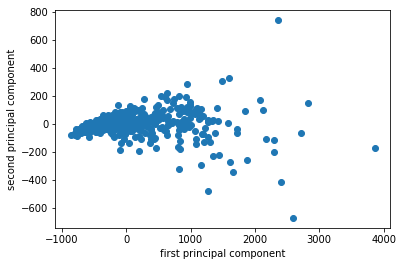

In [5]:
from sklearn.decomposition import PCA
print(cancer.data.shape)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(cancer.data)
print(X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("first principal component")
plt.ylabel("second principal component")

Text(0, 0.5, 'second principal component')

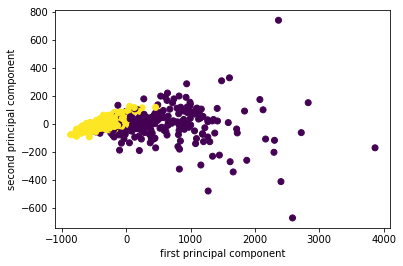

In [6]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cancer.target)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

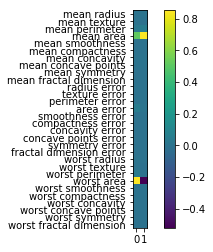

In [7]:
components = pca.components_
plt.imshow(components.T)
plt.yticks(range(len(cancer.feature_names)), cancer.feature_names)
plt.colorbar()
plt.savefig("images/pca-for-visualization-components-color-bar.png")

Text(0, 0.5, 'second principal component')

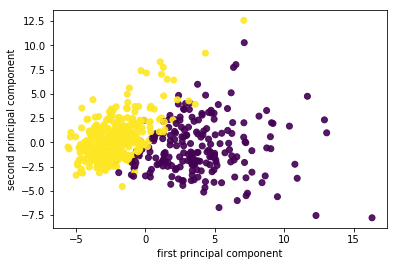

In [8]:
pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2))
X_pca_scaled = pca_scaled.fit_transform(cancer.data)
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=cancer.target, alpha=.9)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

In [9]:
pca.components_

array([[ 0.005,  0.002,  0.035,  0.517,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   , -0.   ,  0.   , -0.   ,  0.002,  0.056, -0.   ,  0.   ,
         0.   ,  0.   , -0.   , -0.   ,  0.007,  0.003,  0.049,  0.852,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.009, -0.003,  0.063,  0.852, -0.   , -0.   ,  0.   ,  0.   ,
        -0.   , -0.   , -0.   ,  0.   ,  0.001,  0.008,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   , -0.001, -0.013, -0.   , -0.52 ,
        -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ]])

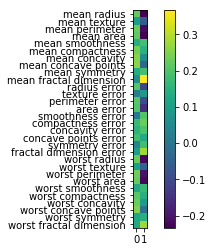

In [10]:
components = pca_scaled.named_steps['pca'].components_
plt.imshow(components.T)
plt.yticks(range(len(cancer.feature_names)), cancer.feature_names)
plt.colorbar()
plt.savefig("images/inspecting-pca-scaled-components.png")

Text(0, 0.5, 'second principal component')

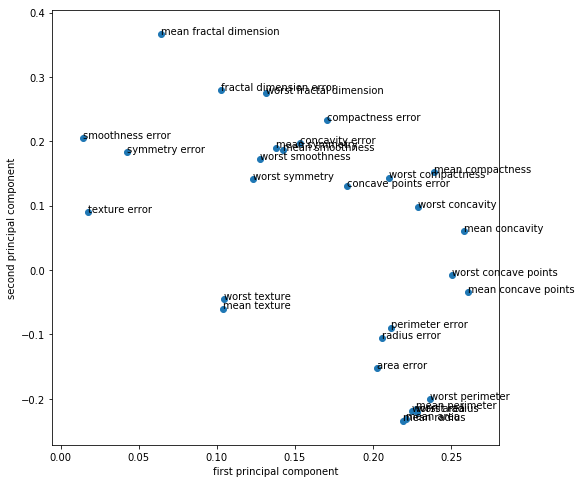

In [11]:
plt.figure(figsize=(8, 8))
plt.scatter(components[0], components[1])
for i, feature_contribution in enumerate(components.T):
    plt.annotate(cancer.feature_names[i], feature_contribution)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [14]:
lr = LogisticRegression(C=10000).fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9929577464788732
0.9440559440559441


/home/andy/checkout/scikit-learn/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
pca_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(C=10000))
pca_lr.fit(X_train, y_train)
print(pca_lr.score(X_train, y_train))
print(pca_lr.score(X_test, y_test))

0.960093896713615
0.9230769230769231


/home/andy/checkout/scikit-learn/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
X_train.shape

(426, 30)

In [17]:
pca.explained_variance_ratio_.shape

(2,)

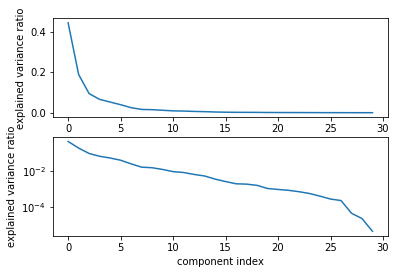

In [18]:
pca_scaled = make_pipeline(StandardScaler(), PCA())
pca_scaled.fit(X_train, y_train)
pca = pca_scaled.named_steps['pca']

fig, axes = plt.subplots(2)
axes[0].plot(pca.explained_variance_ratio_)
axes[1].semilogy(pca.explained_variance_ratio_)
for ax in axes:
    ax.set_xlabel("component index")
    ax.set_ylabel("explained variance ratio")

In [19]:
pca_lr = make_pipeline(StandardScaler(), PCA(n_components=6), LogisticRegression(C=10000))
pca_lr.fit(X_train, y_train)
print(pca_lr.score(X_train, y_train))
print(pca_lr.score(X_test, y_test))

0.9812206572769953
0.958041958041958


/home/andy/checkout/scikit-learn/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
pca = pca_lr.named_steps['pca']
lr = pca_lr.named_steps['logisticregression']

In [21]:
coef_pca = pca.inverse_transform(lr.coef_)

In [22]:
scaled_lr = make_pipeline(StandardScaler(), LogisticRegression(C=1))
scaled_lr.fit(X_train, y_train)

/home/andy/checkout/scikit-learn/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))])

In [23]:
coef_no_pca = scaled_lr.named_steps['logisticregression'].coef_

Text(0, 0.5, 'coefficient value')

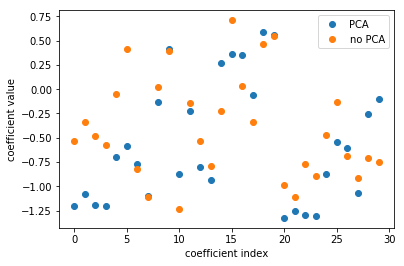

In [24]:
plt.plot(coef_pca.ravel(), 'o', label="PCA")
plt.plot(coef_no_pca.ravel(), 'o', label="no PCA")
plt.legend()
plt.xlabel("coefficient index")
plt.ylabel("coefficient value")

Text(0, 0.5, 'PCA coefficient')

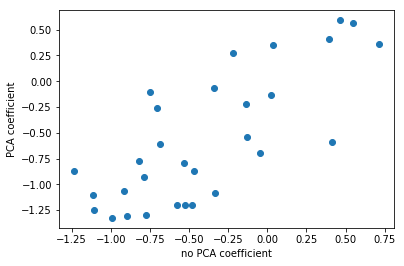

In [25]:
plt.plot(coef_no_pca.ravel(), coef_pca.ravel(), 'o')
plt.xlabel("no PCA coefficient")
plt.ylabel("PCA coefficient")

In [26]:
rng = np.random.RandomState(0)
X = rng.normal(size=(100, 3))
y = X[:, 0] > 0
X *= np.array((1, 15, 20))
X = np.dot(X, rng.normal(size=(3, 3)))

Text(0.5, 0.98, 'Data')

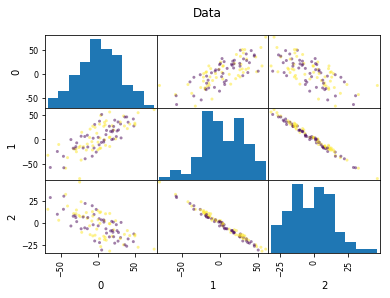

In [27]:
pd.plotting.scatter_matrix(pd.DataFrame(X), c=y)
plt.suptitle("Data")

Text(0.5, 0.98, 'Principal Components')

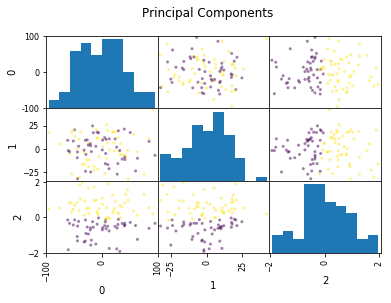

In [28]:
X_pca = PCA().fit_transform(X)
pd.plotting.scatter_matrix(pd.DataFrame(X_pca), c=y)
plt.suptitle("Principal Components")

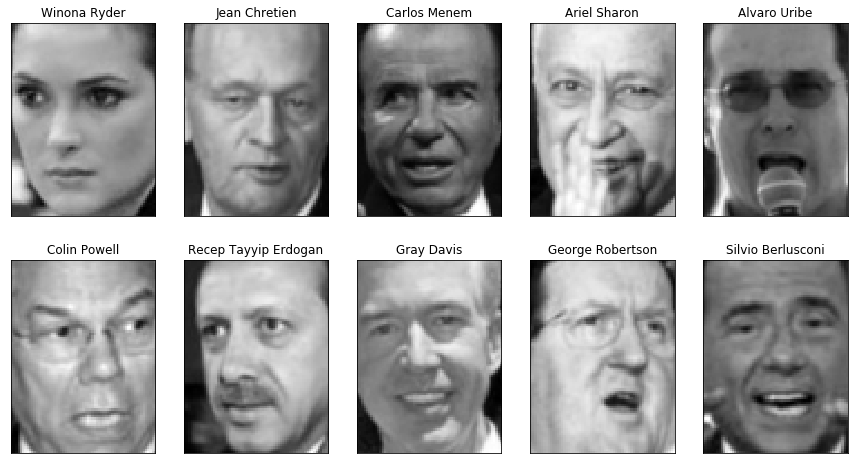

In [29]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap='gray')
    ax.set_title(people.target_names[target])

In [30]:
# have at most 50 images per preson - otherwise too much bush
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]
# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
print(X_train.shape)
# build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

(1547, 5655)
Test set score of 1-nn: 0.23


In [32]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [33]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.31


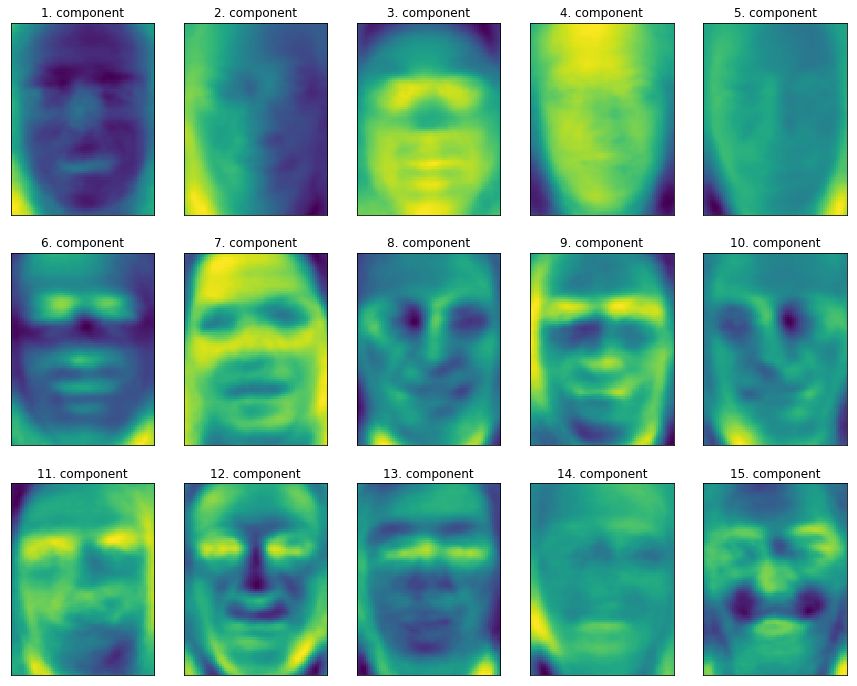

In [34]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
    cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

In [35]:
pca = PCA(n_components=100).fit(X_train)

In [36]:
reconstruction_errors = np.sum((X_test - pca.inverse_transform(pca.transform(X_test))) ** 2, axis=1)

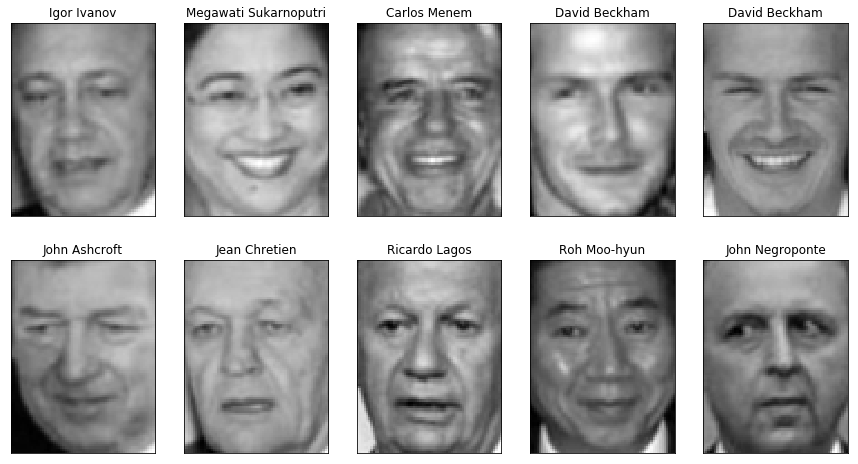

In [37]:
inds = np.argsort(reconstruction_errors)
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(y_test[inds], X_test[inds], axes.ravel()):
    ax.imshow(image.reshape(image_shape), cmap='gray')
    ax.set_title(people.target_names[target])

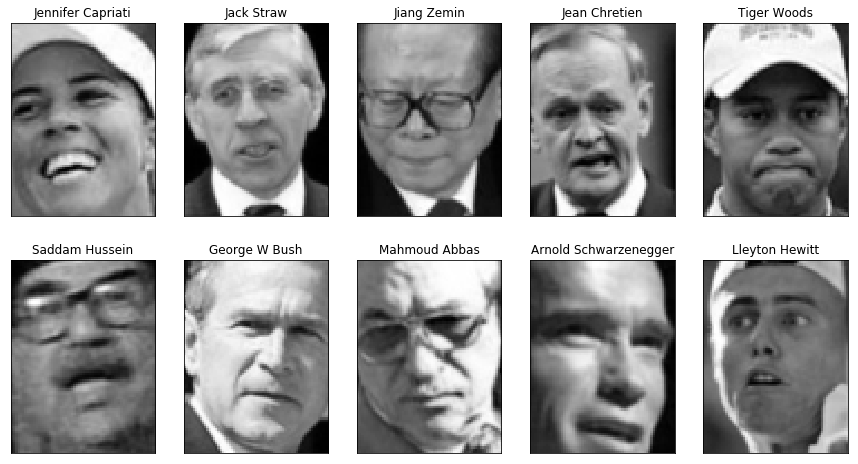

In [38]:
inds = np.argsort(reconstruction_errors)[::-1]
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(y_test[inds], X_test[inds], axes.ravel()):
    ax.imshow(image.reshape(image_shape), cmap='gray')
    ax.set_title(people.target_names[target])

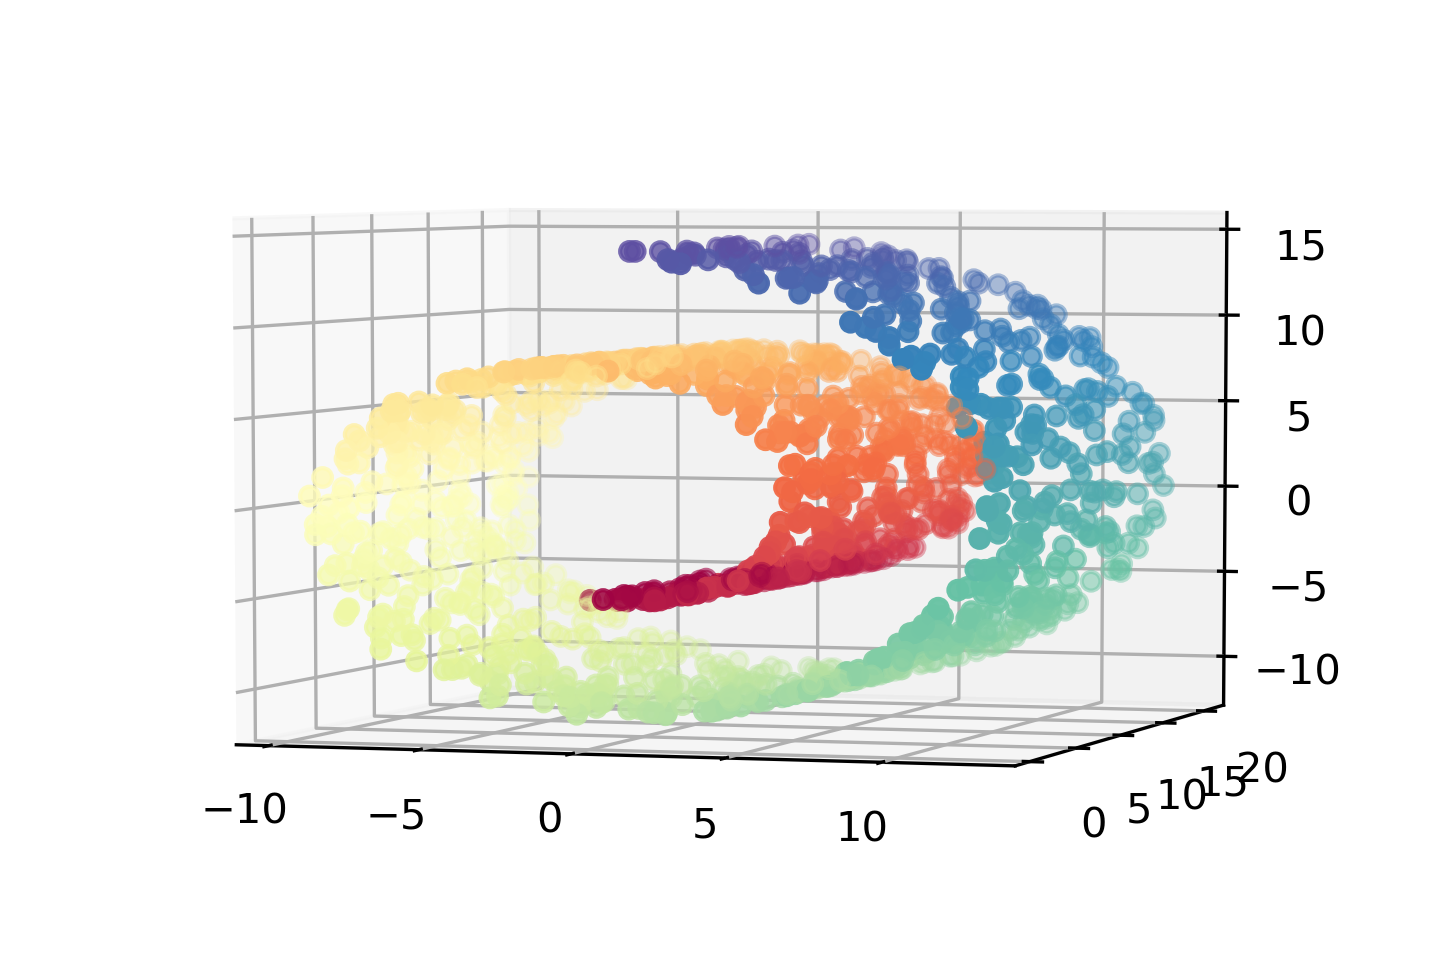

In [42]:
# This import is needed to modify the way figure behaves
from mpl_toolkits.mplot3d import Axes3D
Axes3D

#----------------------------------------------------------------------
# Locally linear embedding of the swiss roll

from sklearn import manifold, datasets
X, color = datasets.samples_generator.make_swiss_roll(n_samples=1500)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
plt.savefig("images/manifold-learning-structure.png", bbox_inches="tight", dpi=500)

In [60]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data / 16.

In [61]:
X_tsne = TSNE().fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X)

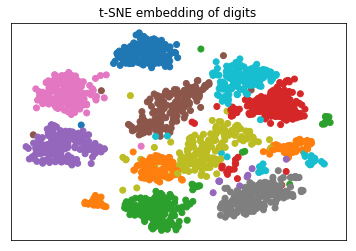

In [66]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=plt.cm.Vega10(digits.target))
plt.title("t-SNE embedding of digits")
plt.xticks(())
plt.yticks(())
plt.savefig("images/tsne-digits.png")

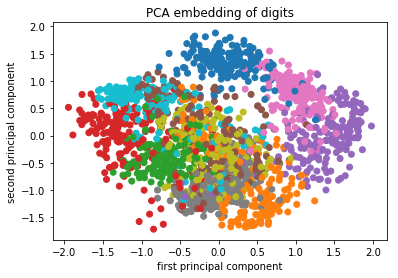

In [67]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=plt.cm.Vega10(digits.target))
plt.title("PCA embedding of digits")
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.savefig("images/pca-digits.png")

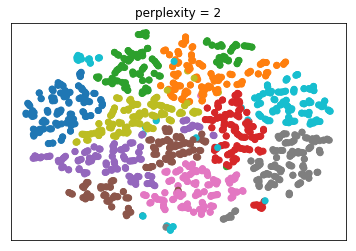

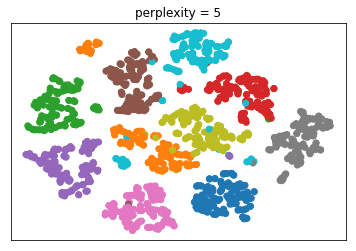

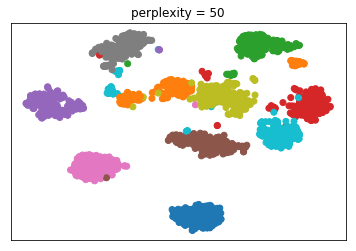

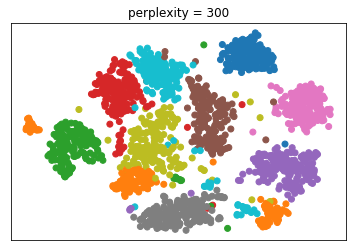

In [69]:
for perplexity in [2, 5, 50, 300]:
    plt.figure()
    plt.xticks(())
    plt.yticks(())
    X_tsne = TSNE(perplexity=perplexity).fit_transform(X)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=plt.cm.Vega10(digits.target))
    plt.title("perplexity = {}".format(perplexity))
    plt.savefig("images/tsne-tuning-{}".format(perplexity))

Computing t-SNE embedding


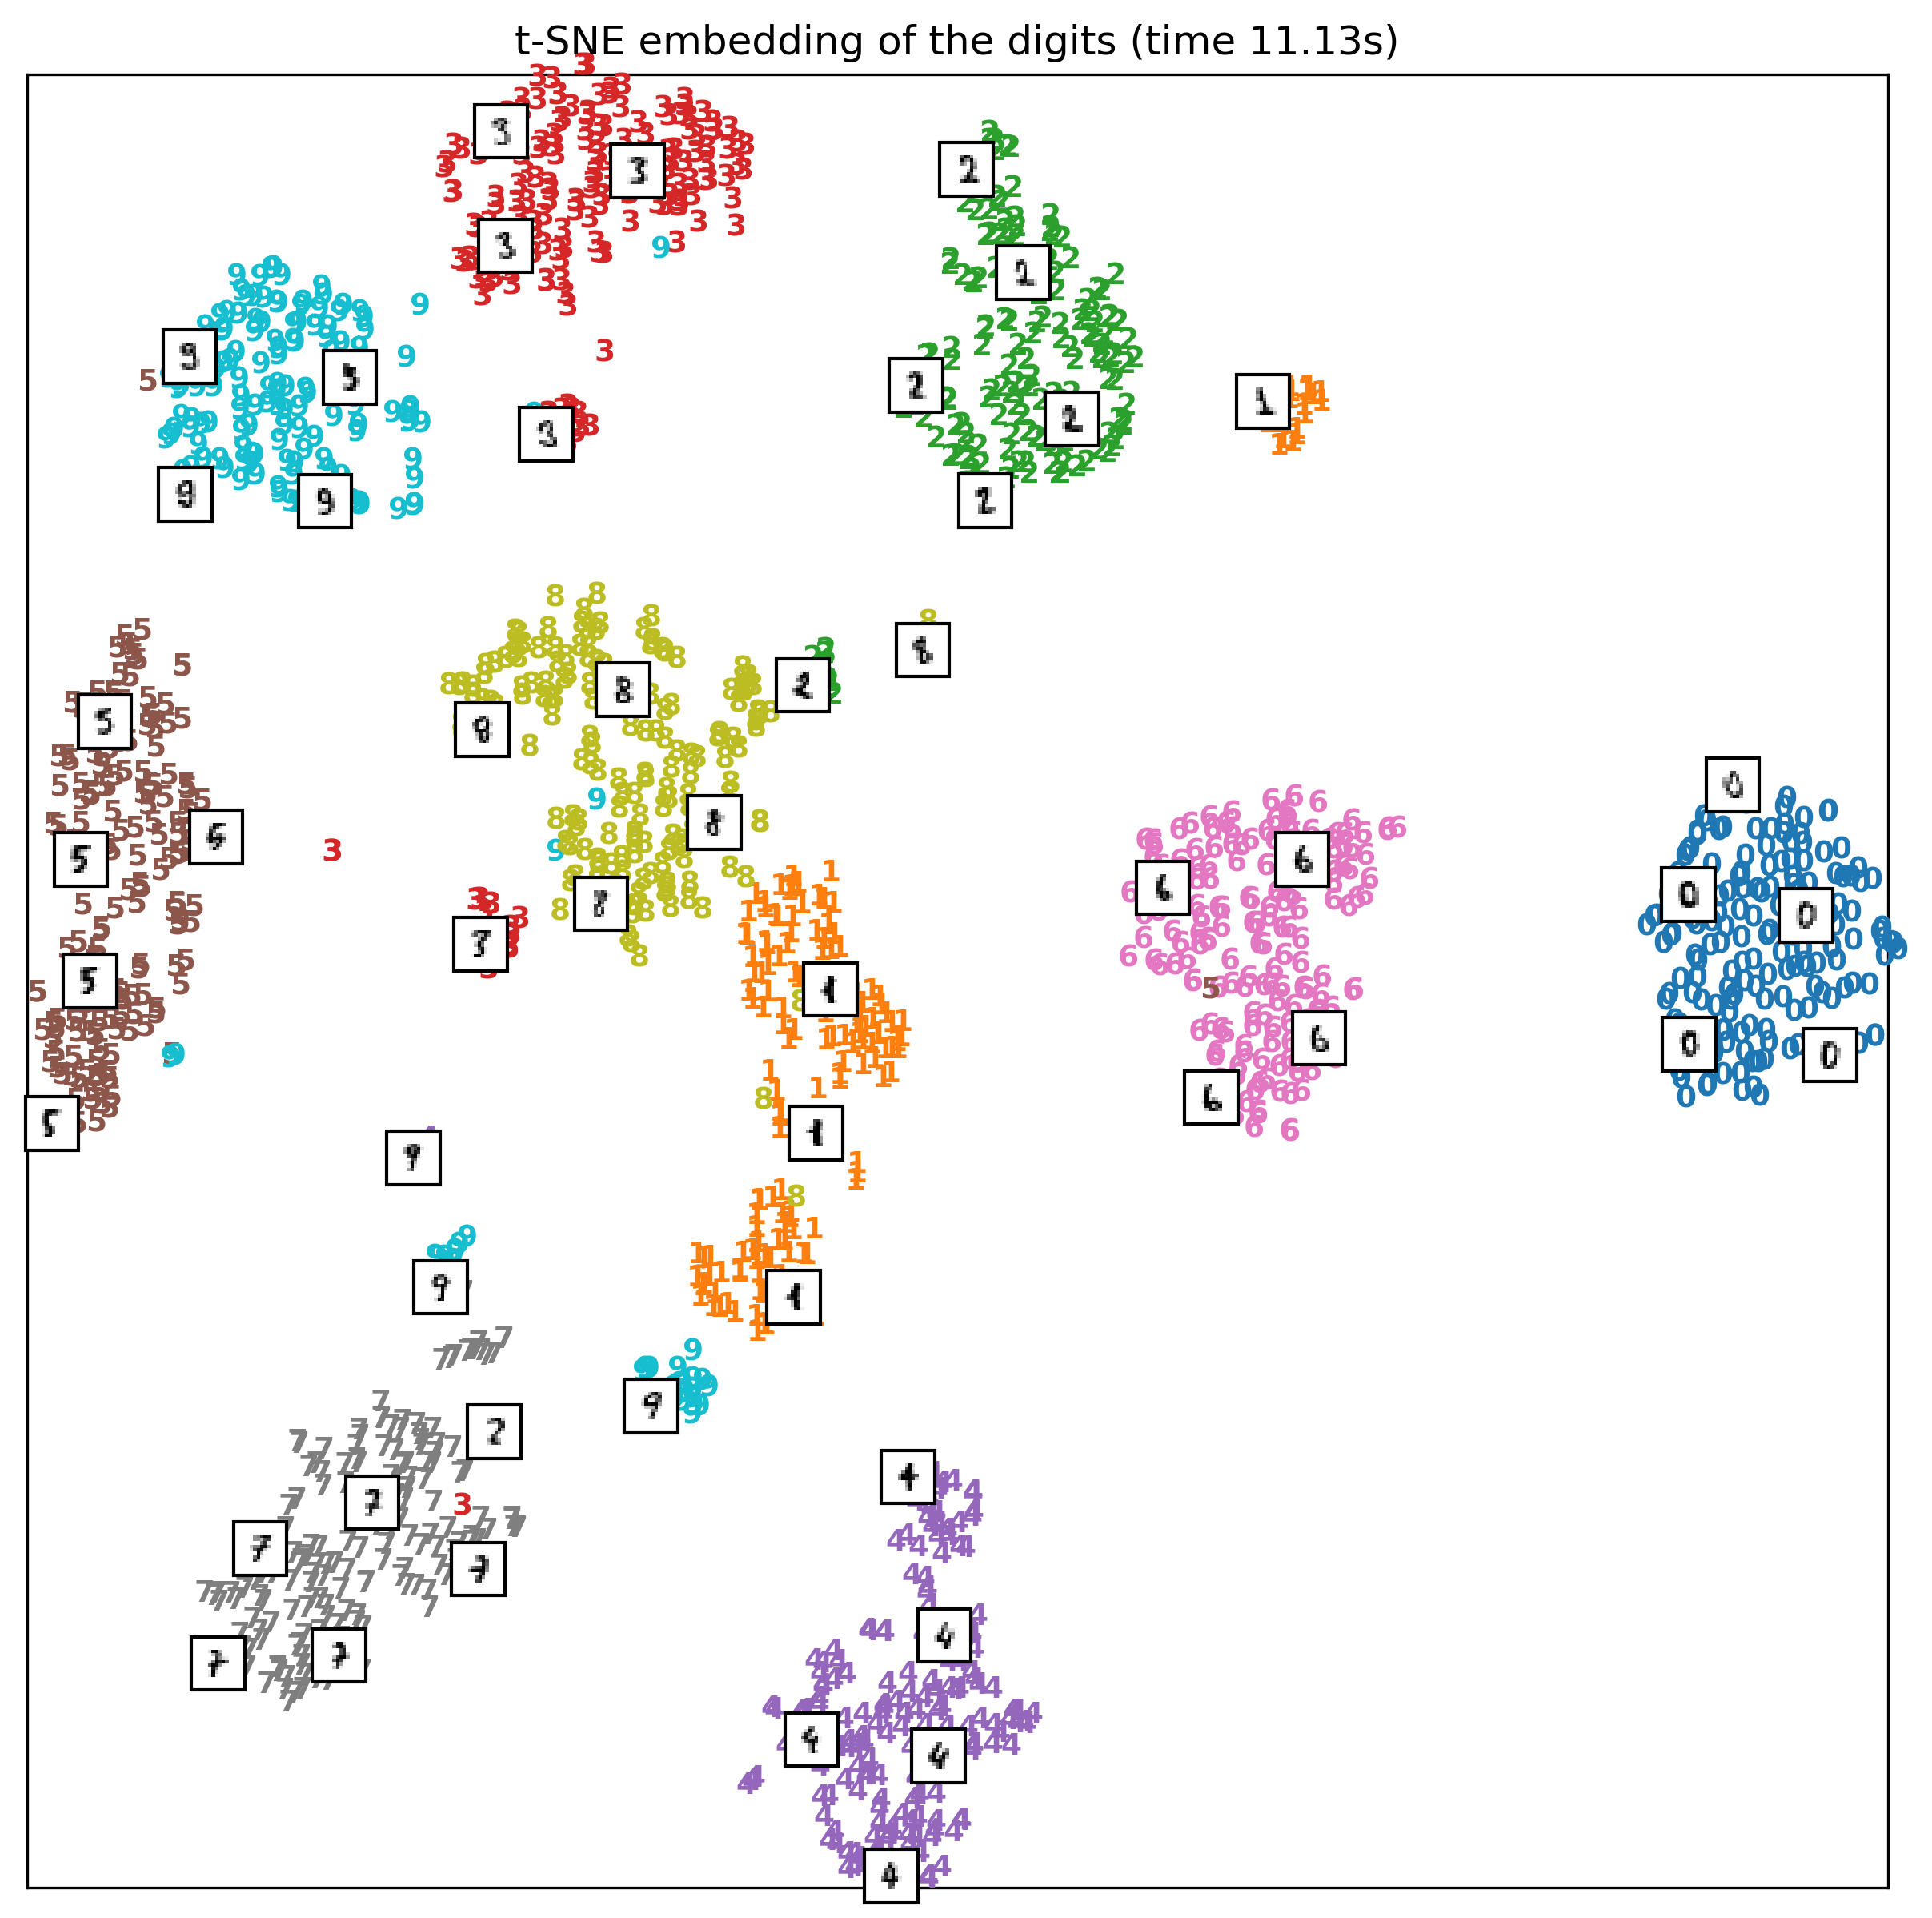

In [56]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

digits = datasets.load_digits()
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30


#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(dpi=300, figsize=(10, 10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Vega10(y[i]),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.savefig("images/tsne-embeddings-digits.png")

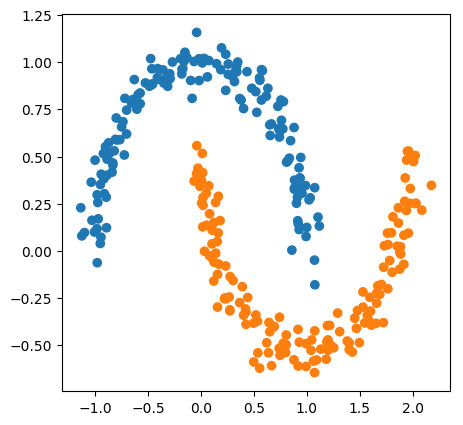

In [271]:
from sklearn.datasets import make_moons
plt.figure(figsize=(5, 5))
X, y = make_moons(n_samples=300, noise=.07, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(y))

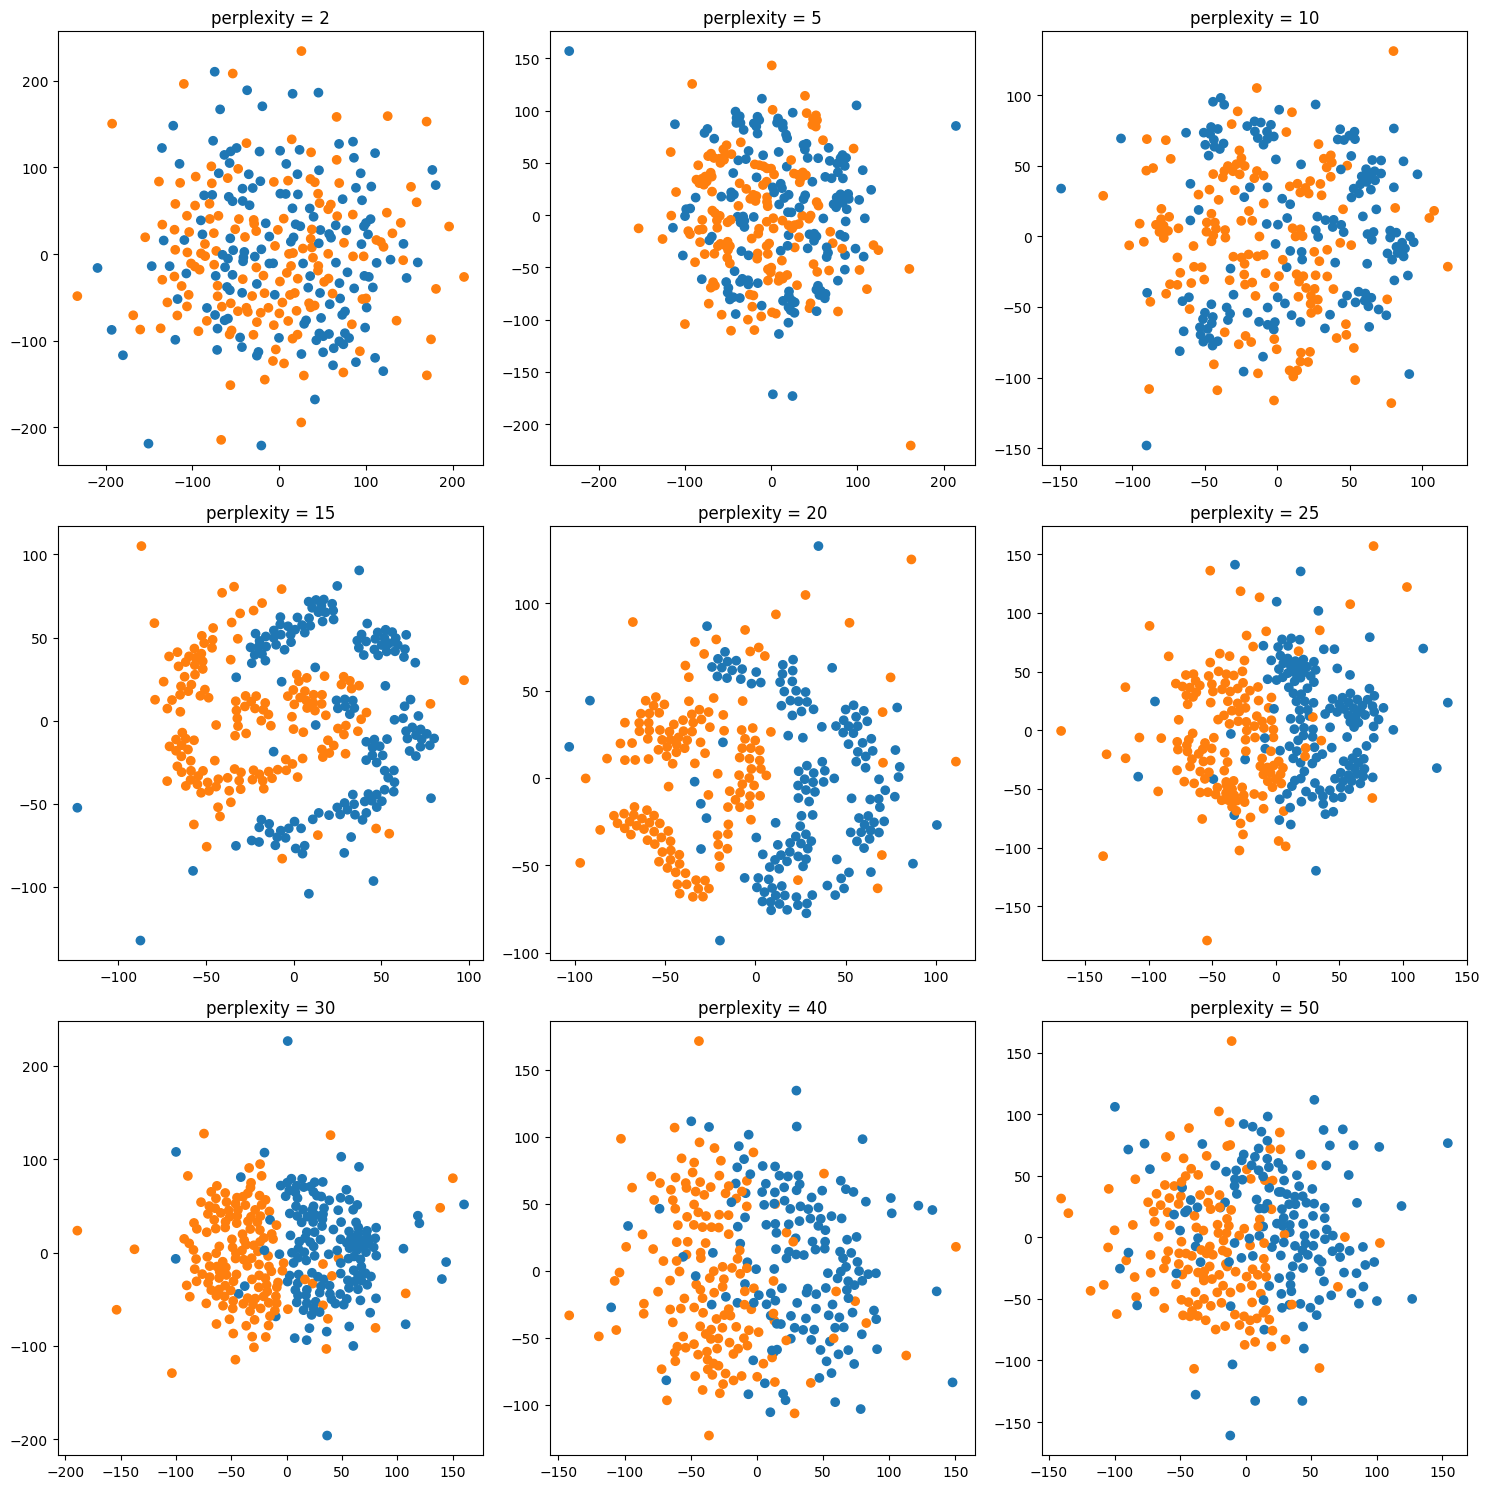

In [269]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for ax, perplexity in zip(axes.ravel(), [2, 5, 10, 15, 20, 25, 30, 40, 50]):
    X_tsne = TSNE(perplexity=perplexity, random_state=0).fit_transform(X)
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=plt.cm.Vega10(y))
    ax.set_title("perplexity = {}".format(perplexity))
fig.tight_layout()

## Discriminant Analysis

In [294]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


Linear and Quadratic Discriminant Analysis with covariance ellipsoid

This example plots the covariance ellipsoids of each class and
decision boundary learned by LDA and QDA. The ellipsoids display
the double standard deviation for each class. With LDA, the
standard deviation is the same for all the classes, while each
class has its own standard deviation with QDA.



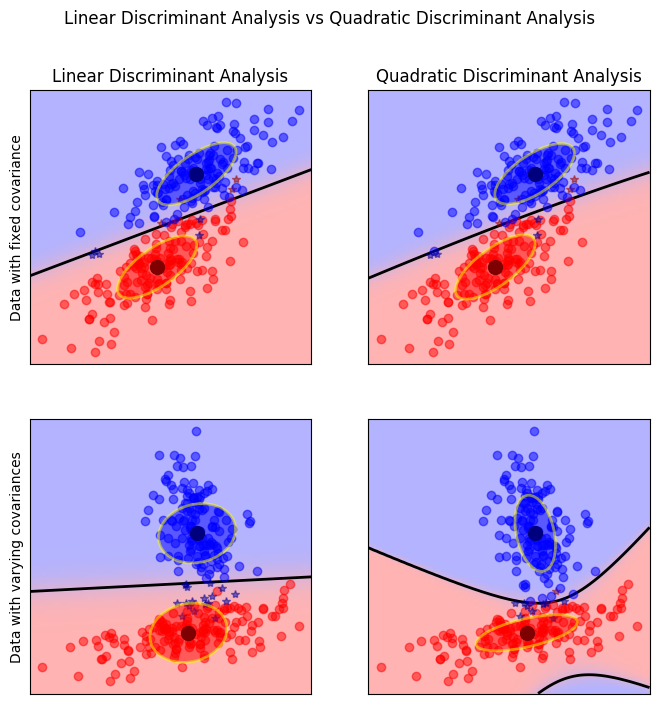

In [308]:
"""
====================================================================
Linear and Quadratic Discriminant Analysis with covariance ellipsoid
====================================================================

This example plots the covariance ellipsoids of each class and
decision boundary learned by LDA and QDA. The ellipsoids display
the double standard deviation for each class. With LDA, the
standard deviation is the same for all the classes, while each
class has its own standard deviation with QDA.
"""
print(__doc__)

from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

###############################################################################
# colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)


###############################################################################
# generate datasets
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 150, 2
    np.random.seed(0)
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


def dataset_cov():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    n, dim = 150, 2
    np.random.seed(0)
    C = np.array([[0., -1.], [2.5, .7]]) * 2.
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C.T) + np.array([1, 15])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


###############################################################################
# plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with fixed covariance')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index == 3:
        plt.ylabel('Data with varying covariances')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    alpha = 0.5

    # class 0: dots
    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', alpha=alpha,
             color='red')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], '*', alpha=alpha,
             color='#990000')  # dark red

    # class 1: dots
    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'o', alpha=alpha,
             color='blue')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], '*', alpha=alpha,
             color='#000099')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             'o', color='black', markersize=10)
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             'o', color='black', markersize=10)
    plt.gca().set_aspect("equal")
    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color, edgecolor='yellow',
                              linewidth=2, zorder=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariances_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariances_[1], 'blue')

plt.figure(figsize=(8, 8))
###############################################################################
for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis('tight')

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariances=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plot_qda_cov(qda, splot)
    plt.axis('tight')
plt.suptitle('Linear Discriminant Analysis vs Quadratic Discriminant Analysis')
plt.show()

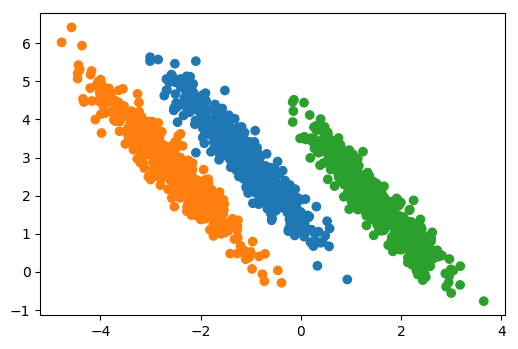

In [325]:
from sklearn.datasets import make_blobs
n_samples = 1500
random_state = 3
X_, y = make_blobs(n_samples=n_samples, centers=3, random_state=random_state)

transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X = np.dot(X_, transformation)
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(y))

In [326]:
X_pca = PCA(whiten=True).fit_transform(X)

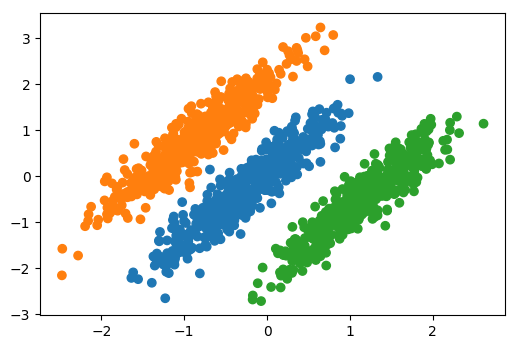

In [327]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=plt.cm.Vega10(y))

In [328]:
lda = LinearDiscriminantAnalysis().fit(X, y)
X_lda = lda.transform(X)

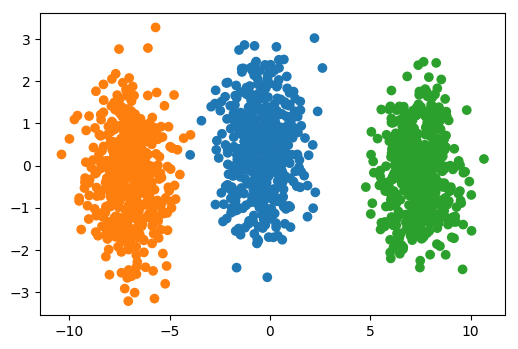

In [329]:
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=plt.cm.Vega10(y))

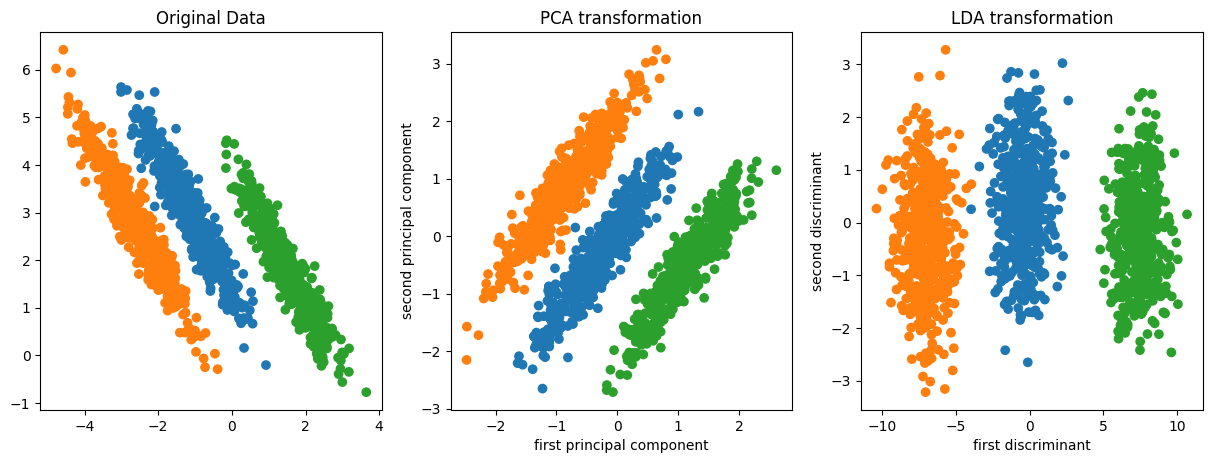

In [332]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].set_title("Original Data")
ax[0].scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(y))
ax[1].set_title("PCA transformation")
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=plt.cm.Vega10(y))
ax[1].set_xlabel("first principal component")
ax[1].set_ylabel("second principal component")
ax[2].scatter(X_lda[:, 0], X_lda[:, 1], c=plt.cm.Vega10(y))
ax[2].set_title("LDA transformation")
ax[2].set_xlabel("first discriminant")
ax[2].set_ylabel("second discriminant")

In [334]:
rng = np.random.RandomState(0)
X = rng.normal(size=(100, 3))
y = X[:, 0] > 0
X *= np.array((1, 15, 20))
X = np.dot(X, rng.normal(size=(3, 3)))
lda = LinearDiscriminantAnalysis().fit(X, y)
lda_direction = lda.transform(X)

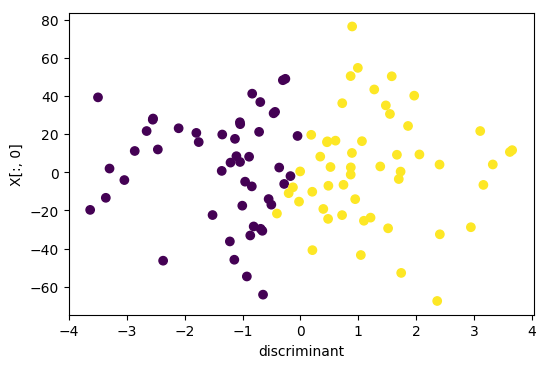

In [343]:
plt.scatter(lda_direction.ravel(), X[:, 0], c=y)
plt.xlabel("discriminant")
plt.ylabel("X[:, 0]")

In [347]:
X_lda = LinearDiscriminantAnalysis(n_components=2).fit_transform(digits.data / 16., digits.target)

/home/andy/checkout/scikit-learn/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


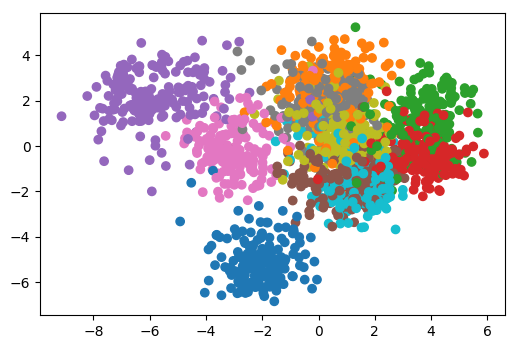

In [348]:
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=plt.cm.Vega10(digits.target))
